**Project 3 - Part 1 (Core)**

For this assignment, you will be starting a new portfolio project that you will continue to build on over the remaining weeks of this course.

* For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
* You will then answer the provided stakeholder questions and support your answers with visualizations.

**Chicago Crime Data**

* We have prepared a zip file with the Chicago crime data which you can download [here](https://drive.google.com/file/d/1avxUlCAros-R9GF6SKXqM_GopzO7VwA5/view?usp=drive_link).

* Original Source: Chicago Data Portal: Crimes 2001 to Present
    * Data Description:
        * All Crimes that were reported in the city of Chicago and their details [View Preview](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data)

    * Includes:
        * type of crime, exact date/time, lat/long, District/ward, was there an arrest, etc.
    * Note: The original .csv is very large and needs to be processed into smaller files to fit inside a GitHub repository.
    * We have provided a .zip file (linked above) with the data in a repo-friendly format. For those who are curious the code for converting the downloaded file to the .zip file of individual years, please see [this helper notebook](https://github.com/coding-dojo-data-science/preparing-chicago-crime-data/blob/admin/Workflow%20-%20Prep%20Chicago%20Crime%20Data.ipynb).

* Supplemental Data: Holiday Data
    * Check the lesson on "Feature Engineering: Holidays" to see how to use the Python 'holidays' package to add holidays to your dataset.

* Notes/Considerations:
    * You may need to keep 2 forms of the data:
        * The original individual crime data with a datetime index. (Each row is 1 crime)
        * A resampled/converted crime counts version (Each row is 1 day)

# Task

Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

**Stakeholder Questions to Answer (Pick at least 3 topics):**

Select 3 or more of the following topics to analyze:

* Topic 1) Comparing Police Districts
    * Which district had the most crimes in 2022?
    * Which had the least?

* Topic 2) Crimes Across the Years:
    * Is the total number of crimes increasing or decreasing across the years?
    * Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

* Topic 3) Comparing AM vs. PM Rush Hour:
    * Are crimes more common during AM rush hour or PM rush hour?
        * You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
        * You can consider any crime that occurred between 4 - 7 PM as PM rush hour.

    * Answer the question: What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
    * Answer the question: Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

* Topic 4) Comparing Months:
    * Answer the question: What months have the most crime? What months have the least?
    * Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

* Topic 5) Comparing Holidays:
    * Answer the question: What are the top 3 holidays with the largest number of crimes?
    * Answer the question: For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

* Topic 6) What cycles (seasonality) can you find in this data?
    * Make sure to select the data of interest and that it is resampled to the frequency you want. (See the "Suggested data to check for seasons" list at the bottom of this topic for suggestions) .
    * Use statsmodels.tsa.seasonal.seasonal_decompose() to decompose the time series.
        * Note: seasonal_decompose cannot read data resampled as minutes or smaller, and if you try seconds, you will crash your computer. Keep your resampling at hours or more.
    * Show and describe each cycle you can find.
        * (Hint: If your seasonal results are too dense to read, try zooming in to look at just one year or one month and try different levels of resampling).
        * Answer the question: How long is a cycle?
        * Answer the question: What is the magnitude of the cycle? (Compare min and max).
    
    * Suggested data to check for seasons:
        * Total Crime (Daily)
        * Total Crime (Weekly)
        * Total Crime (Monthly)
        * Select a Primary Type of interest to you (Daily)
        * Select a Primary Type of interest to you (Weekly)
        * Select a Primary Type of interest to you (Monthly)

**Final Submission**
Submit the link to your GitHub Repository (make sure it is public!)

# Solution

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#set_config(transform_output="pandas")
plt.rcParams["figure.figsize"] = (12, 4)
sns.set_context("talk", font_scale=0.9)

In [2]:
# You must first load the data
import glob
folder = "Data/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [4]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [5]:
df.shape

(7713109, 12)

In [6]:
# Convert the date column to datetime dtype.
# Double check if the results are correct and as expected --in the appropriate format! Correct if not.
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p')
df['Date']

0        2001-01-01 01:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
238853   2022-12-31 12:50:00
238854   2022-12-31 12:50:00
238855   2022-12-31 12:52:00
238856   2022-12-31 12:52:00
238857   2022-12-31 12:59:00
Name: Date, Length: 7713109, dtype: datetime64[ns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [8]:
# Set date as index
df_indexed = df.set_index('Date')
df_indexed

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [9]:
df_indexed.columns

Index(['ID', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [11]:
# Melt the wide-form data into a long-form time series.
df_melted = pd.melt(df, id_vars=['ID', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Latitude', 'Longitude'])
df_melted

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable,value
0,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date,2001-01-01 01:00:00
1,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date,2001-01-01 01:00:00
2,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date,2001-01-01 01:00:00
3,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date,2001-01-01 01:00:00
4,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713104,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date,2022-12-31 12:50:00
7713105,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date,2022-12-31 12:50:00
7713106,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date,2022-12-31 12:52:00
7713107,12938420,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,Date,2022-12-31 12:52:00


In [12]:
# The value column should be named “Date”
df_melted = df_melted.rename(columns={"value":"Date"})
df_melted

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable,Date
0,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date,2001-01-01 01:00:00
1,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date,2001-01-01 01:00:00
2,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date,2001-01-01 01:00:00
3,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date,2001-01-01 01:00:00
4,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713104,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date,2022-12-31 12:50:00
7713105,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date,2022-12-31 12:50:00
7713106,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date,2022-12-31 12:52:00
7713107,12938420,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,Date,2022-12-31 12:52:00


In [13]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  variable              object        
 12  Date                  datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [14]:
# Set datetime as index
df_ts = df_melted.set_index('Date')
df_ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date


In [15]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
 11  variable              object 
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


**Stakeholder Questions to Answer (Pick at least 3 topics):**

Select 3 or more of the following topics to analyze:

Topic 1) Comparing Police Districts

Which district had the most crimes in 2022?
Which had the least?

In [16]:
df_topic1 = df_ts.loc['2022']
df_topic1

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Date,,,,,,,,,,,,
2022-01-01 01:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060,Date
2022-01-01 01:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446,Date
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120,Date
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147,Date
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560,Date
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date


In [17]:
# Make a copy
df_topic1 = df_topic1.copy()
df_topic1

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Date,,,,,,,,,,,,
2022-01-01 01:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060,Date
2022-01-01 01:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446,Date
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120,Date
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147,Date
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560,Date
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date


In [18]:
crimes_per_district = df_topic1['District'].value_counts()
crimes_per_district

8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: District, dtype: int64

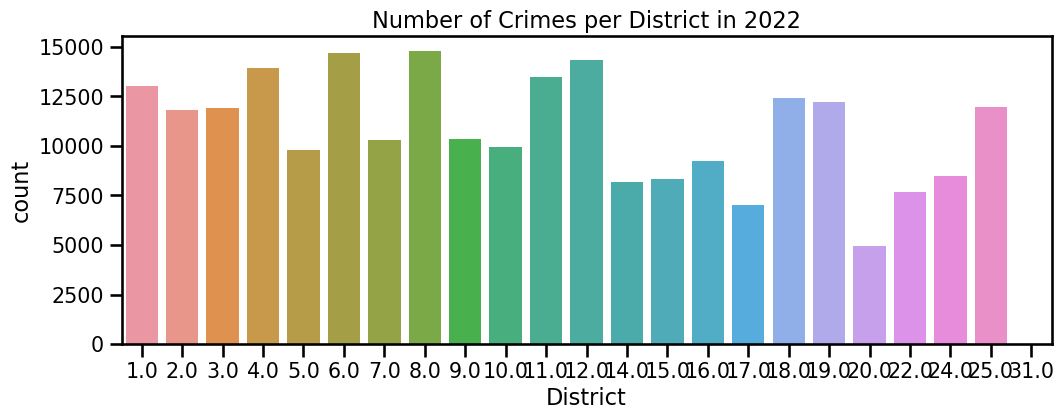

In [19]:
# Plot crimes per district
sns.countplot(df_topic1, x="District").set(title="Number of Crimes per District in 2022");

* Which district had the most crimes in 2022? District 8 had the highest number of crimes at 14805.
* Which had the least? District 31 had the lowest number of crimes at only 15.

**Topic 4) Comparing Months:**

Answer the question: What months have the most crime? What months have the least?

Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [20]:
df_topic4 = df_ts.copy()
df_topic4

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date


In [21]:
# Extract month from Date index
df_topic4['Month'] = df_topic4.index.month
df_topic4.head()

# Source: https://stackoverflow.com/questions/54110673/pandas-extracting-month-and-year-from-index

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable,Month
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date,1
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date,1
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date,1
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date,1
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date,1


In [22]:
df_topic4 = df_topic4.groupby('Month').count()
df_topic4

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Month,,,,,,,,,,,,
1,601236,601236,601236,600028,601236,601236,601236,601235,526544,591549,591549,601236
2,529391,529391,529391,528597,529391,529391,529391,529391,462809,523148,523148,529391
3,629704,629704,629704,628836,629704,629704,629704,629704,552423,623224,623224,629704
4,627175,627175,627175,626310,627175,627175,627175,627175,561263,620756,620756,627175
5,682932,682932,682932,682070,682932,682932,682932,682931,641315,677602,677602,682932
6,681739,681739,681739,680843,681739,681739,681739,681738,640302,675076,675076,681739
7,717232,717232,717232,716318,717232,717232,717232,717230,672822,710523,710523,717232
8,710444,710444,710444,709577,710444,710444,710444,710440,666700,703054,703054,710444
9,668242,668242,668242,667343,668242,668242,668242,668236,627101,661408,661408,668242


In [23]:
crimes_per_month = df_topic4['Primary Type']
crimes_per_month

Month
1     601236
2     529391
3     629704
4     627175
5     682932
6     681739
7     717232
8     710444
9     668242
10    676285
11    608961
12    579768
Name: Primary Type, dtype: int64

Text(0, 0.5, 'Counts')

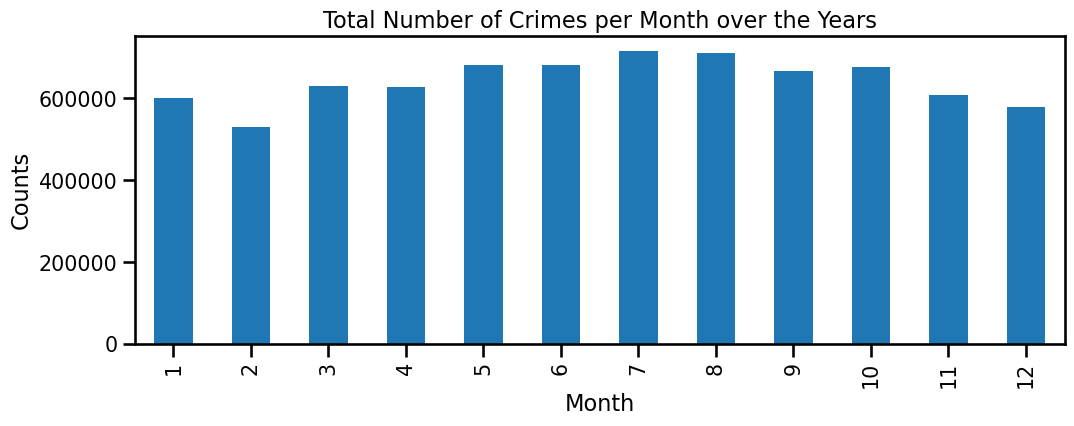

In [24]:
# Plot crimes by Month
ax = crimes_per_month.plot(kind='bar')
ax.set_title('Total Number of Crimes per Month over the Years')
ax.set_ylabel('Counts')

Answer the question: What months have the most crime? What months have the least? July (7) had the most crimes, it seems that the middle of year has the most crimes from June to August. 
The least number of crimes are in February and December, which is surprising.

In [25]:
df_topic4b = df_ts.copy()
df_topic4b

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date


In [26]:
# Extract month from Date index
df_topic4b['Month'] = df_topic4b.index.month
df_topic4b.head()

# Source: https://stackoverflow.com/questions/54110673/pandas-extracting-month-and-year-from-index

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable,Month
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date,1
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date,1
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date,1
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date,1
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date,1


In [27]:
# Primary Type grouped Monthly
crimes_per_month = df_topic4b.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_per_month

Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9190
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [28]:
# Unstack crimes per month to transpose
crimes_per_month_unstacked = crimes_per_month.unstack(level=0)
crimes_per_month_unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Month,,,,,,,,,,,,,,,,,,,,,
1,917.0,34818.0,101302.0,32639.0,62.0,2575.0,62574.0,539.0,18471.0,30291.0,...,42162.0,6383.0,8.0,3499.0,3.0,23412.0,2725.0,378.0,123454.0,7934.0
2,807.0,33416.0,93601.0,25652.0,69.0,1896.0,55428.0,435.0,16679.0,25387.0,...,38578.0,5659.0,15.0,3401.0,1.0,17271.0,2019.0,313.0,104948.0,6400.0
3,1111.0,41709.0,117869.0,30073.0,77.0,2112.0,71873.0,504.0,18734.0,28648.0,...,43249.0,6141.0,9.0,4669.0,3.0,20190.0,2367.0,399.0,123733.0,8171.0
4,1097.0,42031.0,118500.0,31372.0,78.0,2134.0,75104.0,438.0,17737.0,27702.0,...,41632.0,6034.0,13.0,4341.0,1.0,20907.0,2274.0,392.0,125642.0,8408.0
5,1230.0,48453.0,135678.0,36066.0,96.0,2404.0,79685.0,538.0,18379.0,27554.0,...,42213.0,6089.0,22.0,5493.0,1.0,23707.0,2804.0,396.0,137505.0,9938.0
6,1236.0,47255.0,135905.0,35958.0,92.0,2512.0,78921.0,592.0,17492.0,28276.0,...,40654.0,5574.0,22.0,4976.0,NaN,24407.0,2934.0,419.0,143411.0,9402.0
7,1350.0,47900.0,136817.0,39279.0,95.0,2676.0,83397.0,604.0,18029.0,28540.0,...,41548.0,5875.0,13.0,4721.0,1.0,27243.0,3064.0,429.0,159067.0,9788.0
8,1182.0,46455.0,128734.0,40597.0,96.0,2596.0,81708.0,586.0,18564.0,29192.0,...,41093.0,6284.0,25.0,4397.0,3.0,27395.0,2895.0,406.0,158942.0,9887.0
9,1131.0,45427.0,122346.0,38388.0,118.0,2449.0,75468.0,560.0,17914.0,27924.0,...,37167.0,5877.0,19.0,4884.0,3.0,26167.0,2785.0,395.0,145609.0,9435.0


In [50]:
pd.options.display.max_columns = 500

In [51]:
crimes_per_month_unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,917.0,34818.0,101302.0,32639.0,62.0,2575.0,62574.0,539.0,18471.0,30291.0,1.0,360.0,795.0,15.0,1332.0,358.0,596.0,1140.0,30240.0,65943.0,2.0,11.0,1.0,75.0,6213.0,8.0,42162.0,6383.0,8.0,3499.0,3.0,23412.0,2725.0,378.0,123454.0,7934.0
2,807.0,33416.0,93601.0,25652.0,69.0,1896.0,55428.0,435.0,16679.0,25387.0,NaN,389.0,652.0,9.0,1313.0,303.0,521.0,1095.0,25130.0,63923.0,5.0,12.0,2.0,52.0,3997.0,13.0,38578.0,5659.0,15.0,3401.0,1.0,17271.0,2019.0,313.0,104948.0,6400.0
3,1111.0,41709.0,117869.0,30073.0,77.0,2112.0,71873.0,504.0,18734.0,28648.0,NaN,744.0,794.0,9.0,1486.0,393.0,616.0,1424.0,28740.0,69127.0,NaN,12.0,1.0,88.0,4617.0,12.0,43249.0,6141.0,9.0,4669.0,3.0,20190.0,2367.0,399.0,123733.0,8171.0
4,1097.0,42031.0,118500.0,31372.0,78.0,2134.0,75104.0,438.0,17737.0,27702.0,NaN,1238.0,964.0,3.0,1437.0,377.0,556.0,1347.0,27909.0,62989.0,1.0,11.0,1.0,51.0,4445.0,9.0,41632.0,6034.0,13.0,4341.0,1.0,20907.0,2274.0,392.0,125642.0,8408.0
5,1230.0,48453.0,135678.0,36066.0,96.0,2404.0,79685.0,538.0,18379.0,27554.0,NaN,1637.0,1118.0,6.0,1645.0,412.0,685.0,1392.0,29635.0,63168.0,4.0,12.0,NaN,72.0,4877.0,18.0,42213.0,6089.0,22.0,5493.0,1.0,23707.0,2804.0,396.0,137505.0,9938.0
6,1236.0,47255.0,135905.0,35958.0,92.0,2512.0,78921.0,592.0,17492.0,28276.0,NaN,1874.0,1275.0,9.0,1693.0,392.0,678.0,1476.0,30414.0,59008.0,9.0,14.0,NaN,65.0,4785.0,9.0,40654.0,5574.0,22.0,4976.0,NaN,24407.0,2934.0,419.0,143411.0,9402.0
7,1350.0,47900.0,136817.0,39279.0,95.0,2676.0,83397.0,604.0,18029.0,28540.0,NaN,1964.0,1387.0,7.0,1787.0,425.0,625.0,1350.0,32668.0,61935.0,2.0,17.0,1.0,72.0,4539.0,17.0,41548.0,5875.0,13.0,4721.0,1.0,27243.0,3064.0,429.0,159067.0,9788.0
8,1182.0,46455.0,128734.0,40597.0,96.0,2596.0,81708.0,586.0,18564.0,29192.0,NaN,2219.0,1252.0,9.0,1819.0,405.0,584.0,1303.0,32727.0,64400.0,5.0,18.0,1.0,52.0,4595.0,18.0,41093.0,6284.0,25.0,4397.0,3.0,27395.0,2895.0,406.0,158942.0,9887.0
9,1131.0,45427.0,122346.0,38388.0,118.0,2449.0,75468.0,560.0,17914.0,27924.0,NaN,1799.0,1211.0,14.0,1677.0,441.0,620.0,1262.0,31708.0,60925.0,5.0,17.0,1.0,68.0,4414.0,14.0,37167.0,5877.0,19.0,4884.0,3.0,26167.0,2785.0,395.0,145609.0,9435.0


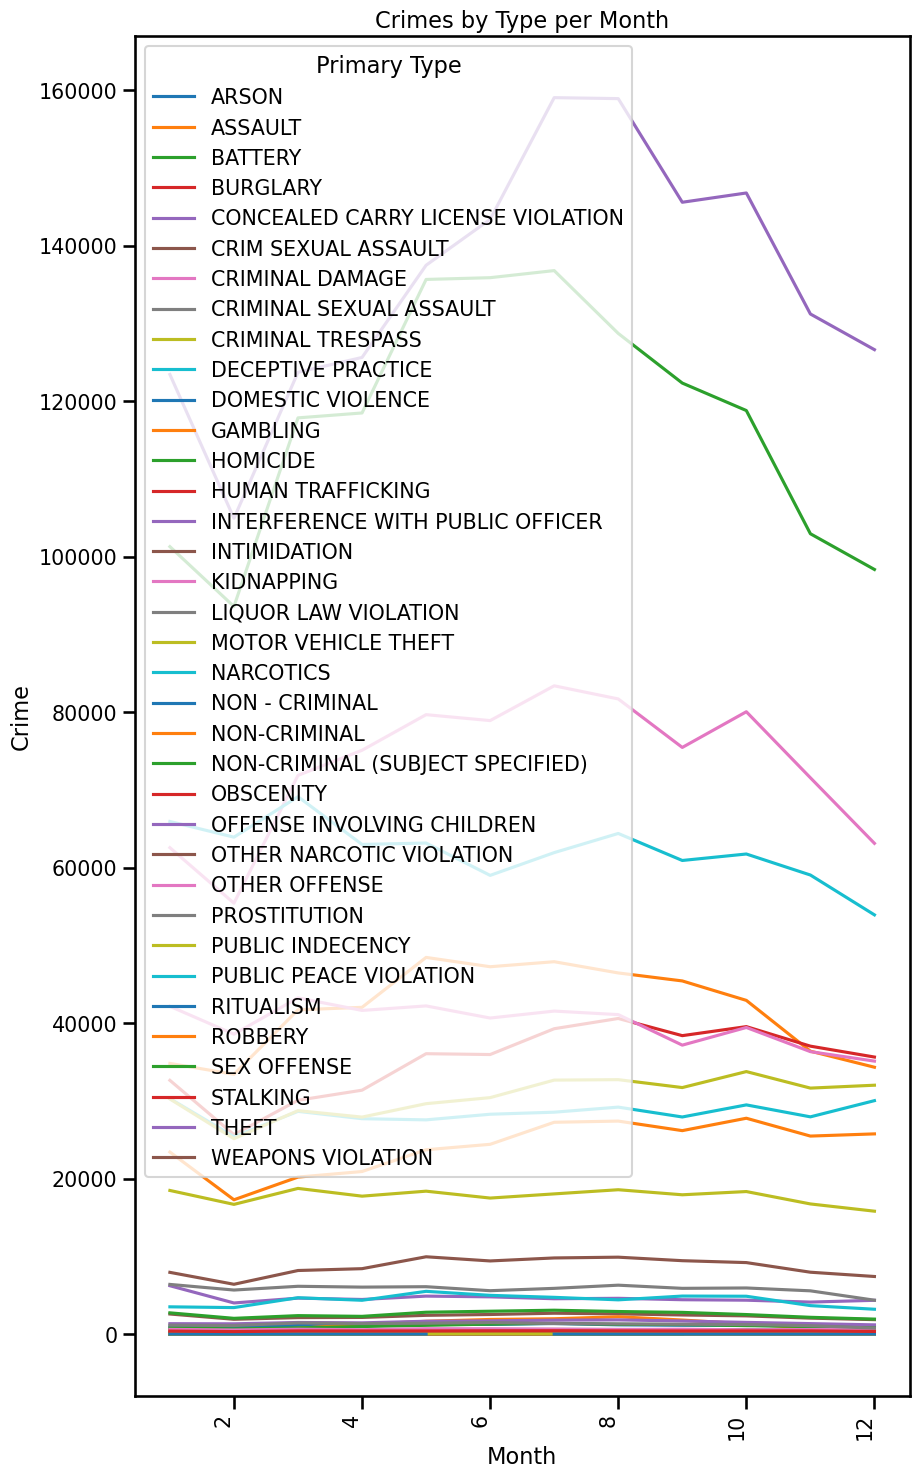

In [29]:
# PLot the unstacked version
ax = crimes_per_month_unstacked.plot(figsize=(10,20))
ax.set(title='Crimes by Type per Month', ylabel='Crime')

# Edit final xdates
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90);

Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

It looks like most of the crimes follow the general pattern, except for Criminal Damage and Narcotics with sharp drops in June.

**Topic 5) Comparing Holidays:**

Answer the question: What are the top 3 holidays with the largest number of crimes?
Answer the question: For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [30]:
!pip install holidays

In [31]:
# Import packages related to holidays
import holidays
import datetime as dt
from holidays import country_holidays

In [32]:
df_topic5 = df_ts.copy()
df_topic5

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date


In [33]:
df_topic5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
 11  variable              object 
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [34]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [35]:
## making a date range that covers full dataset
all_dates = pd.date_range(df_ts['Date'].min(), df_ts['Date'].max())
all_dates

KeyError: 'Date'

In [ ]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in df_ts]
holiday_list[:5]

**Topic 2) Crimes Across the Years:**

Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [36]:
df_topic2 = df_ts.copy()
df_topic2

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,Date
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,Date
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,Date


In [37]:
# Extract year from Date index
df_topic2['Year'] = df_topic2.index.year
df_topic2.head()

# Source: https://stackoverflow.com/questions/54110673/pandas-extracting-month-and-year-from-index

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable,Year
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,Date,2001
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,Date,2001
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,Date,2001
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,Date,2001
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,Date,2001


In [38]:
df_topic2_yearly = df_topic2.groupby('Year').count()
df_topic2_yearly

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,variable
Year,,,,,,,,,,,,
2001,485886,485886,485886,485881,485886,485886,485886,485886,4303,482876,482876,485886
2002,486807,486807,486807,486802,486807,486807,486807,486807,353697,471531,471531,486807
2003,475985,475985,475985,475981,475985,475985,475985,475985,475966,472041,472041,475985
2004,469422,469422,469422,469407,469422,469422,469422,469420,469400,467211,467211,469422
2005,453773,453773,453773,453755,453773,453773,453773,453772,453772,449930,449930,453773
2006,448179,448179,448179,448161,448179,448179,448179,448178,448176,445564,445564,448179
2007,437087,437087,437087,437064,437087,437087,437087,437085,437082,435708,435708,437087
2008,427183,427183,427183,427100,427183,427183,427183,427143,427179,419897,419897,427183
2009,392827,392827,392827,392733,392827,392827,392827,392827,392824,385963,385963,392827


In [39]:
crimes_per_year = df_topic2_yearly['Primary Type']
crimes_per_year

Year
2001    485886
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437087
2008    427183
2009    392827
2010    370513
2011    351993
2012    336319
2013    307536
2014    275789
2015    264787
2016    269823
2017    269100
2018    268899
2019    261325
2020    212194
2021    208824
2022    238858
Name: Primary Type, dtype: int64

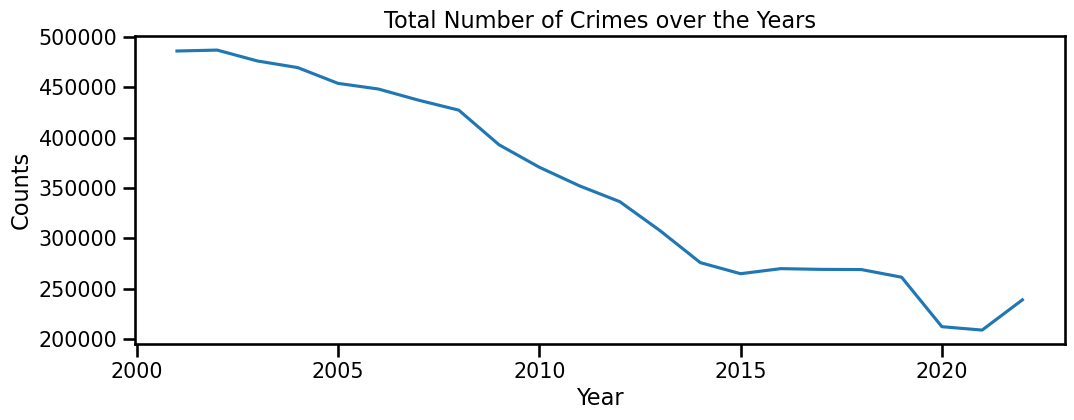

In [40]:
# Plot crimes by Year
ax = crimes_per_year.plot()
ax.set_title('Total Number of Crimes over the Years')
ax.set_ylabel('Counts');

Is the total number of crimes increasing or decreasing across the years? The total number of crimes is decreasing over the years.

In [41]:
# Primary Type grouped Yearly
crimes_per_year = df_topic2.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_per_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2018    5456
                   2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
Name: Year, Length: 689, dtype: int64

In [42]:
# Unstack crimes per year to transpose
crimes_per_year_unstacked = crimes_per_year.unstack(level=0)
crimes_per_year_unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2001,1011.0,31384.0,93461.0,26014.0,1.0,1779.0,55859.0,29.0,13241.0,14949.0,...,29662.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0
2002,1032.0,31523.0,94153.0,25623.0,NaN,1807.0,55941.0,27.0,13880.0,13732.0,...,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0
2003,955.0,29477.0,88380.0,25157.0,NaN,1571.0,55011.0,41.0,14807.0,13459.0,...,31148.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004,778.0,28850.0,87136.0,24564.0,NaN,1538.0,53164.0,42.0,15913.0,13255.0,...,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005,691.0,27067.0,83964.0,25503.0,NaN,1521.0,54548.0,37.0,16655.0,13590.0,...,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1817.0,192.0,85684.0,4106.0
2006,726.0,25945.0,80666.0,24324.0,NaN,1439.0,57124.0,47.0,14505.0,13606.0,...,27101.0,7034.0,4.0,3068.0,7.0,15968.0,1576.0,186.0,86240.0,3821.0
2007,712.0,26313.0,79593.0,24858.0,NaN,1507.0,53749.0,53.0,13699.0,14170.0,...,26863.0,6087.0,5.0,3315.0,1.0,15450.0,1529.0,213.0,85156.0,3554.0
2008,644.0,25448.0,75930.0,26218.0,NaN,1515.0,52843.0,47.0,12310.0,14933.0,...,26532.0,5141.0,4.0,3013.0,NaN,16703.0,1501.0,190.0,88437.0,3877.0
2009,616.0,22861.0,68460.0,26767.0,NaN,1401.0,47725.0,42.0,10851.0,13877.0,...,25601.0,3940.0,10.0,3147.0,NaN,15981.0,1265.0,168.0,80976.0,4159.0


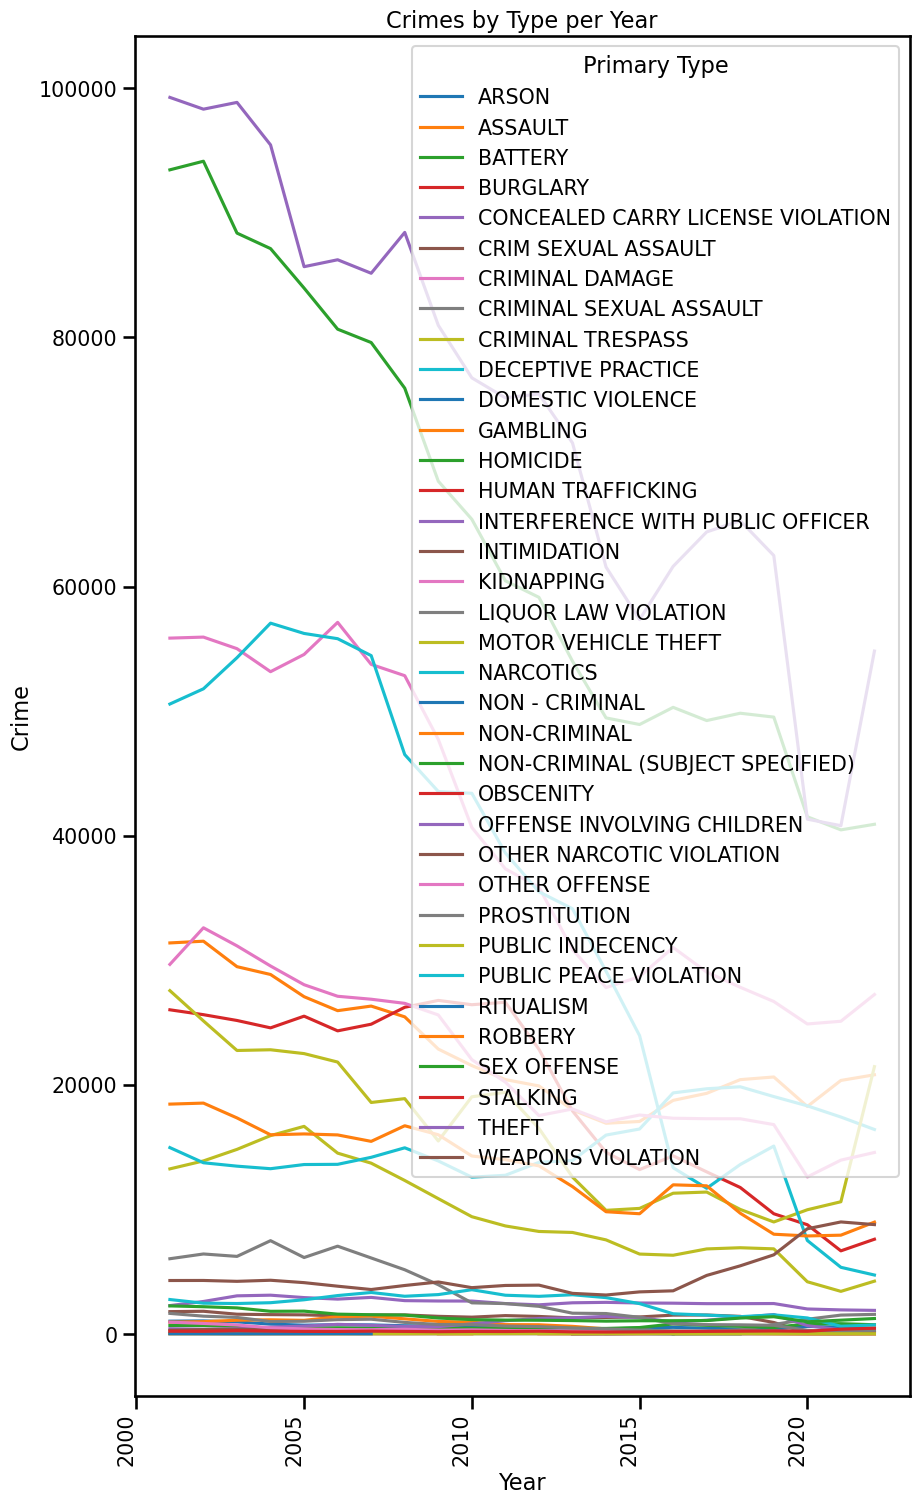

In [43]:
# Plot
# PLot the unstacked version
ax = crimes_per_year_unstacked.plot(figsize=(10,20))
ax.set(title='Crimes by Type per Year', ylabel='Crime')

# Edit final xdates
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90);

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

Generally, the number of crimes per year were decreasing except that there was sudden spike on the number of crimes around 2018-2019 most notably for Theft and Battery.

In [49]:
crimes_per_year_unstacked['THEFT'].sum()

1626992.0

In [45]:
crimes_per_year_unstacked['BATTERY'].sum()

1410889.0

In [52]:
# # Save concat files (to be ignored in commits)
# df.to_csv('Data/Chicago-ALL.csv')

In [53]:
# df_ts.to_csv('Data/Chicago_TS-ALL.csv')